# Univariate Time Series Prediction of Five Air Contaminates

## Import Modules and Data

Import modules.

In [2]:
import pandas as pd
import numpy as np 
% matplotlib inline
import matplotlib.pyplot as plt

Load data.

In [3]:
data = pd.read_csv('AirQualityUCI.csv', sep=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## Data Wrangling

### Missing Value

Get a summary of the data set.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Drop empty/unnamed columns.

In [5]:
data = data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

Count and display missing values.

In [6]:
data.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [7]:
null_data = data[data.isnull().any(axis=1)]
null_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop NaN values and obtain 9357 records.

In [8]:
data = data.dropna()
data.shape

(9357, 15)

By looking into descriptive statistics, we notice min values for all continuous variable is -200, which according to the data set info, is the tag used for missing values. 

In [9]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


Replace -200 values with NaN, and inspect again with descriptive statistics.

In [10]:
data = data.replace(-200, np.nan)
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,8991.000000,914.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000
mean,1099.833166,218.811816,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128
std,217.080037,204.459921,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288
min,647.000000,7.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000
25%,937.000000,67.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000
50%,1063.000000,150.000000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000
75%,1231.000000,297.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


Count new missing values in data.

In [11]:
data.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                   0
RH                  0
AH                  0
dtype: int64

### Time Series Conversion

Get the current index of datafram data.

In [12]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356],
           dtype='int64', length=9357)

Combine values in "Date" and "Time" as new column "Datetime"

In [13]:
data.loc[:,'Datetime'] = data['Date'] + ' ' + data['Time']

For "Datetime", convert string values to datetime data type, and store them in list "DateTime"

In [14]:
from datetime import datetime
DateTime = []
for x in data['Datetime']:
    DateTime.append(datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))

Convert DateTime list to series, and use it as the index of data

In [15]:
datetime = pd.Series(DateTime)
data.index = datetime

By showing the first five records of dataframe, I notice some columns (e.g. CO(GT)) have multiple values per observation, which does not make much realistic sense.

In [16]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",10/03/2004 18.00.00
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",10/03/2004 19.00.00
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",10/03/2004 20.00.00
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",10/03/2004 21.00.00
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",10/03/2004 22.00.00


Let's check the data type of each variable further. Some variables in object should be float64 to have real meanings.

In [17]:
data.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Datetime          object
dtype: object

So I checked back in the excel datasheet, and figured that cvs messed up "." with ",". The following steps are to replace "," with "." in object variables, and convert them to numerics.

In [18]:
data['CO(GT)'] = data['CO(GT)'].str.replace(',', '.').astype(float)
data['C6H6(GT)'] = data['C6H6(GT)'].str.replace(',','.').astype(float)
data['T'] = data['T'].str.replace(',', '.').astype(float)
data['RH'] = data['RH'].str.replace(',', '.').astype(float)
data['AH'] = data['AH'].str.replace(',', '.').astype(float)

### Missing Values Again...

The last step has generated more -200 values.

In [19]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,8991.000000,914.000000,9357.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1099.833166,218.811816,1.865683,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,9.778305,39.485380,-6.837604
std,77.657170,217.080037,204.459921,41.380206,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,43.203623,51.216145,38.976670
min,-200.000000,647.000000,7.000000,-200.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,937.000000,67.000000,4.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,10.900000,34.100000,0.692300
50%,1.500000,1063.000000,150.000000,7.900000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.200000,48.600000,0.976800
75%,2.600000,1231.000000,297.000000,13.600000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Replace -200 with NaN.

In [20]:
data = data.replace(-200, np.nan)

Identify target variables, S1-S5, and fill the missing values with the column mean

In [21]:
S1 = data['PT08.S1(CO)'].fillna(data['PT08.S1(CO)'].mean())
S2 = data['PT08.S2(NMHC)'].fillna(data['PT08.S1(CO)'].mean())
S3 = data['PT08.S3(NOx)'].fillna(data['PT08.S1(CO)'].mean())
S4 = data['PT08.S4(NO2)'].fillna(data['PT08.S1(CO)'].mean())
S5 = data['PT08.S5(O3)'].fillna(data['PT08.S1(CO)'].mean())

Combine S1-S5 as new dataframe df, and save to csv for futher modeling using R.

In [22]:
df = pd.DataFrame({'S1':S1, 'S2':S1, 'S3':S3, 'S4':S4, 'S5':S5})
df.to_csv("AirQuality_processed.csv")

## Exploratory Data Analysis

Plots, S1, S2, S3, S4, and S5.

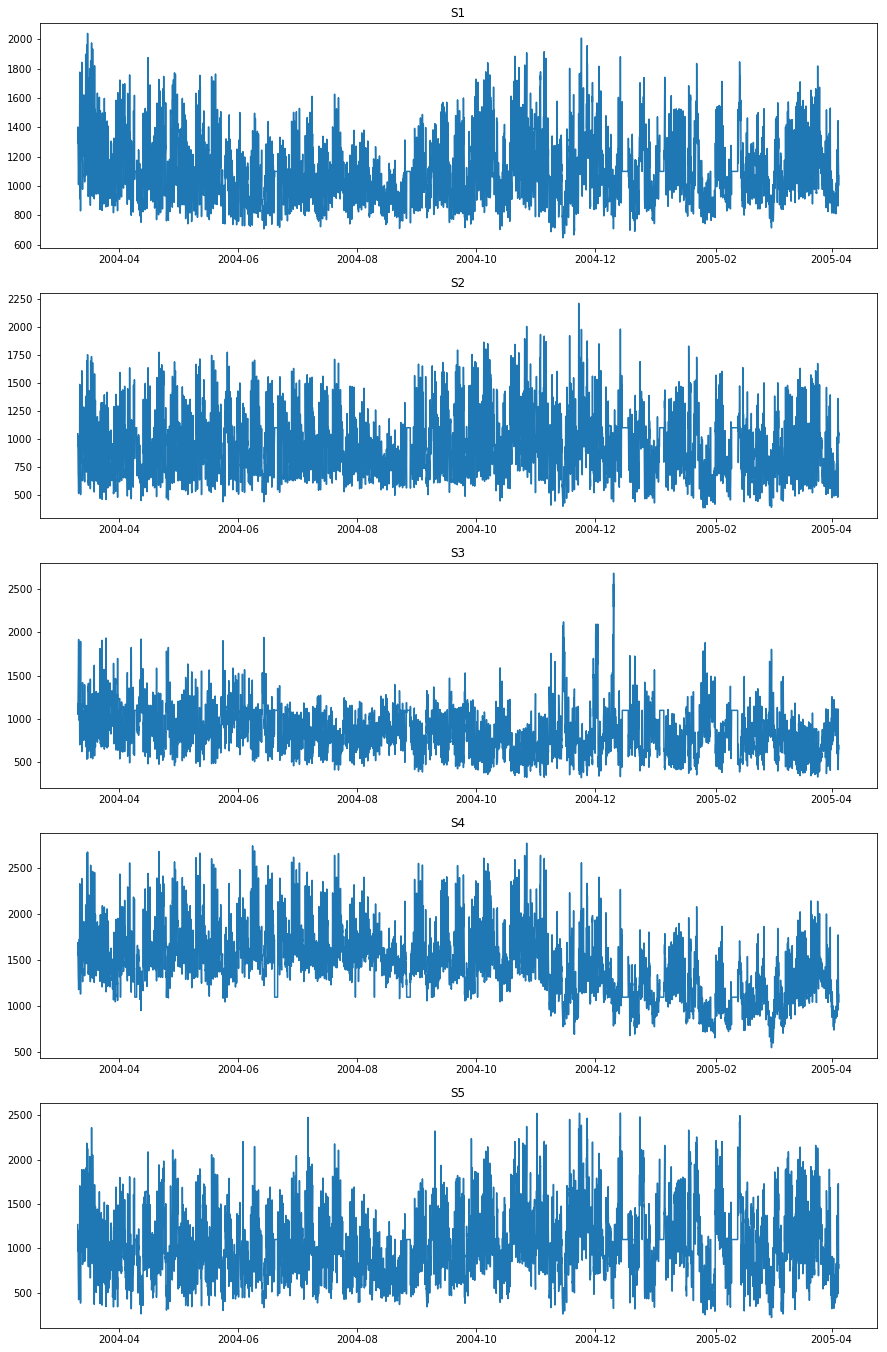

In [23]:
fig, axes = plt.subplots(5,1, figsize=(15,24))

axes[0].plot(S1)
axes[0].set_title ('S1')
axes[1].plot(S2)
axes[1].set_title ('S2')
axes[2].plot(S3)
axes[2].set_title ('S3')
axes[3].plot(S4)
axes[3].set_title ('S4')
axes[4].plot(S5)
axes[4].set_title ('S5')

Plots withn shorter period:  '2004-10-04' - '2004-10-07', S1-S5

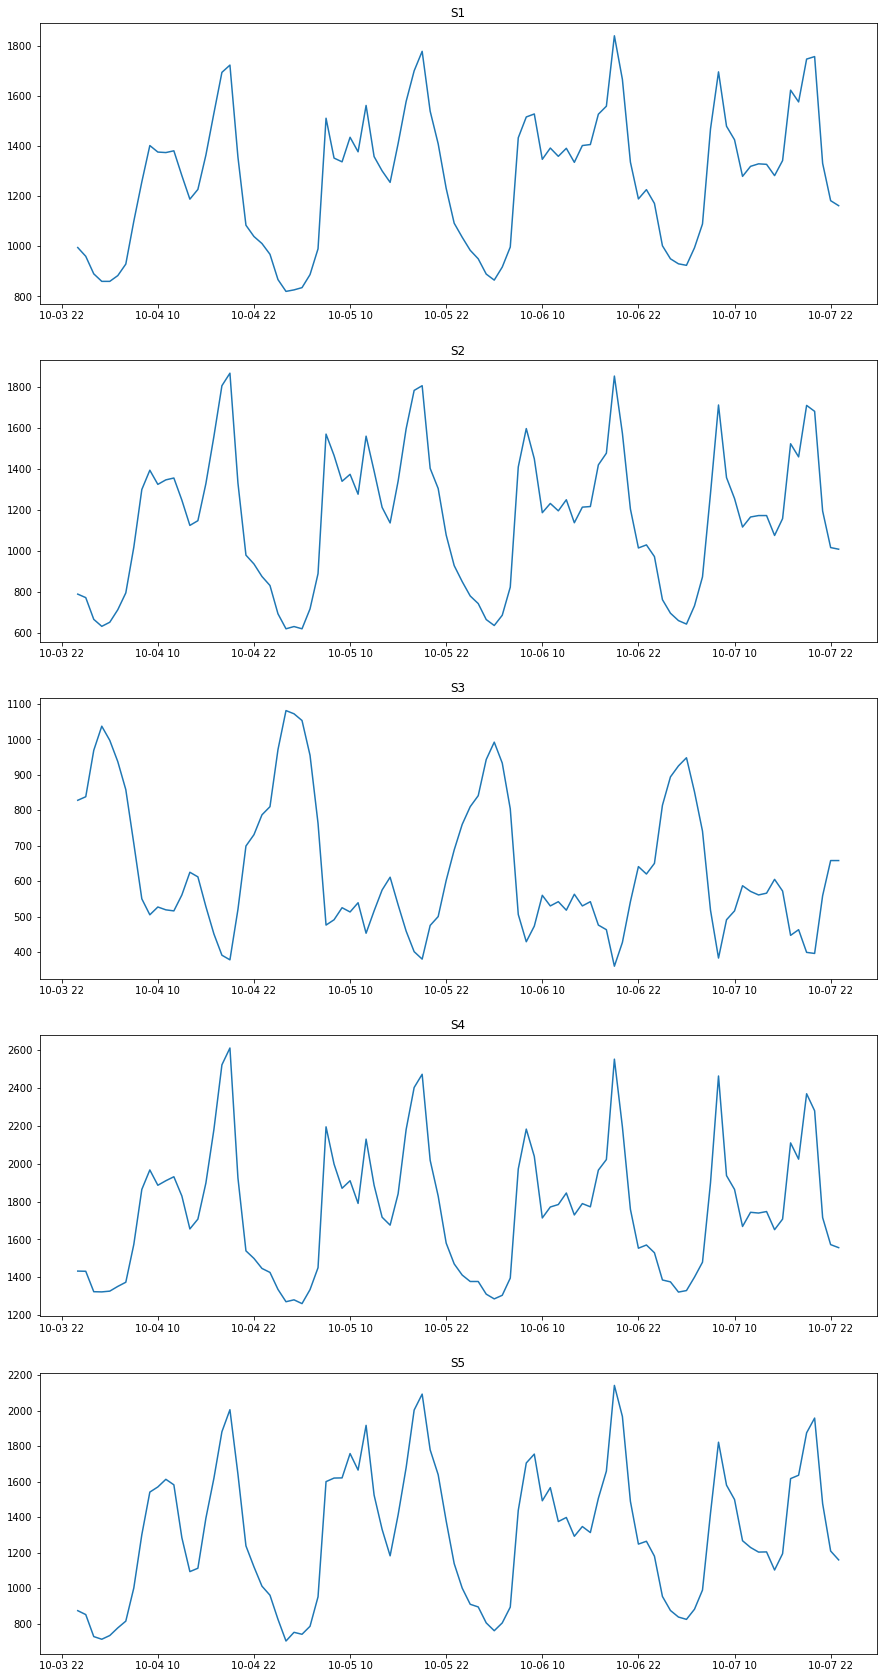

In [32]:
fig, axes = plt.subplots(5,1, figsize=(15,30))

axes[0].plot(S1['2004-10-04':'2004-10-07'])
axes[0].set_title ('S1')
axes[1].plot(S2['2004-10-04':'2004-10-07'])
axes[1].set_title ('S2')
axes[2].plot(S3['2004-10-04':'2004-10-07'])
axes[2].set_title ('S3')
axes[3].plot(S4['2004-10-04':'2004-10-07'])
axes[3].set_title ('S4')
axes[4].plot(S5['2004-10-04':'2004-10-07'])
axes[4].set_title ('S5')

Lag plots of target variables.

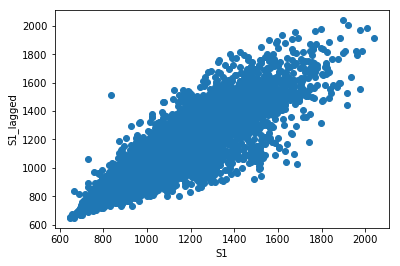

In [27]:
plt.scatter(S1, S1_lagged)
plt.xlabel('S1')
plt.ylabel('S1_lagged')

In [28]:
S2_lagged = S2.shift()
pd.DataFrame({'real': S2, 'lagged': S2_lagged}).corr()

,lagged,real
lagged,1.000000,0.867403
real,0.867403,1.000000


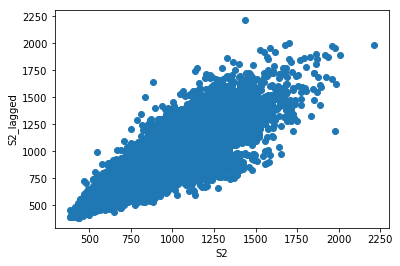

In [29]:
plt.scatter(S2, S2_lagged)
plt.xlabel('S2')
plt.ylabel('S2_lagged')

In [30]:
S3_lagged = S3.shift()
pd.DataFrame({'real': S3, 'lagged': S3_lagged}).corr()

,lagged,real
lagged,1.000000,0.906436
real,0.906436,1.000000


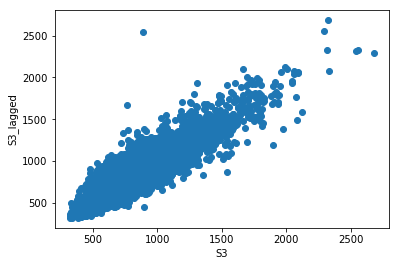

In [31]:
plt.scatter(S3, S3_lagged)
plt.xlabel('S3')
plt.ylabel('S3_lagged')

In [32]:
S4_lagged = S4.shift()
pd.DataFrame({'real': S4, 'lagged': S4_lagged}).corr()

,lagged,real
lagged,1.000000,0.910678
real,0.910678,1.000000


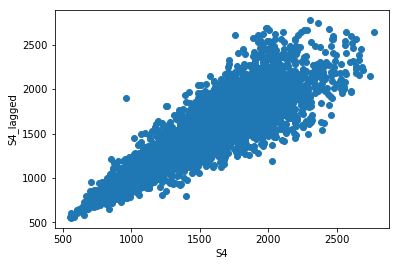

In [33]:
plt.scatter(S4, S4_lagged)
plt.xlabel('S4')
plt.ylabel('S4_lagged')

In [34]:
S5_lagged = S5.shift()
pd.DataFrame({'real': S5, 'lagged': S5_lagged}).corr()

,lagged,real
lagged,1.000000,0.899145
real,0.899145,1.000000


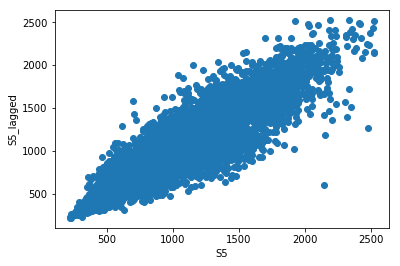

In [35]:
plt.scatter(S5, S5_lagged)
plt.xlabel('S5')
plt.ylabel('S5_lagged')

In [36]:
pd.DataFrame({'S1': S1, 'S2': S2, 'S3': S3, 'S4': S4, 'S5':S5}).corr()

,S1,S2,S3,S4,S5
S1,1.000000,0.892964,-0.771938,0.682881,0.899324
S2,0.892964,1.000000,-0.796703,0.777254,0.880578
S3,-0.771938,-0.796703,1.000000,-0.538468,-0.796569
S4,0.682881,0.777254,-0.538468,1.000000,0.591144
S5,0.899324,0.880578,-0.796569,0.591144,1.000000


## Check Stationarity 

In [33]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolloing statistics
    rolmean = pd.rolling_mean(timeseries, window = 24)
    rolstd = pd.rolling_std(timeseries, window=24)
    
    #Plot rolling statistics:
    orig = plt.plot (timeseries, color='blue', label='Original')
    mean = plt.plot (rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot (rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('rolling Mean & Statndard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


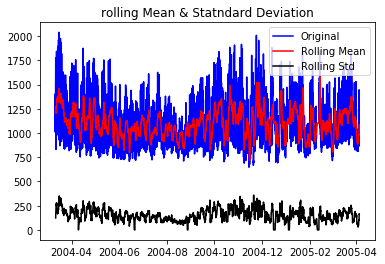

Results of Dickey-Fuller Test:
Test Statistic                -9.732395e+00
p-value                        8.932481e-17
#Lags Used                     3.800000e+01
Number of Observations Used    9.318000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [34]:
test_stationarity(S1)

/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


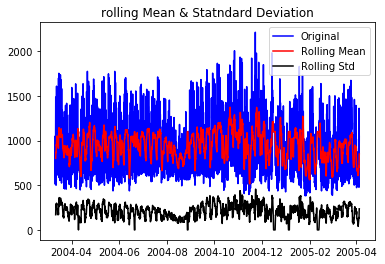

Results of Dickey-Fuller Test:
Test Statistic                -1.058973e+01
p-value                        6.575178e-19
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [35]:
test_stationarity(S2)

/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


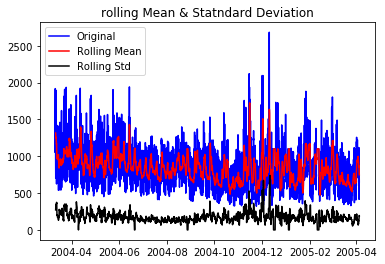

Results of Dickey-Fuller Test:
Test Statistic                -1.063251e+01
p-value                        5.170763e-19
#Lags Used                     3.600000e+01
Number of Observations Used    9.320000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [36]:
gtest_stationarity(S3)

/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


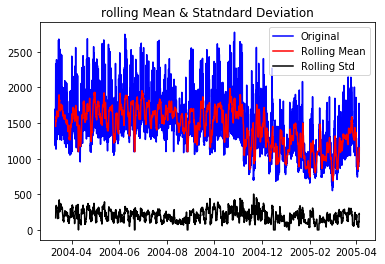

Results of Dickey-Fuller Test:
Test Statistic                -6.305468e+00
p-value                        3.331927e-08
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [37]:
test_stationarity(S4)

/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


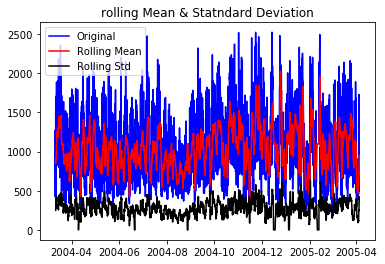

Results of Dickey-Fuller Test:
Test Statistic                -1.110077e+01
p-value                        3.870534e-20
#Lags Used                     3.600000e+01
Number of Observations Used    9.320000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [38]:
test_stationarity(S5)